### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [300]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from scipy.stats import zscore
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
%matplotlib inline

In [301]:
r4_df = pd.read_csv("vehicle.csv")

In [302]:
r4_df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [303]:
r4_df.shape

(846, 19)

In [304]:
#drop NAs
r4_df.dropna(inplace=True)
#now check the no of rows
r4_df.shape

(813, 19)

### 2. Print/ Plot the dependent (categorical variable) - Class column

Since the variable is categorical, you can use value_counts function

In [305]:
#print the 'class' variable distribution using value_counts
r4_df['class'].value_counts()

car    413
bus    205
van    195
Name: class, dtype: int64

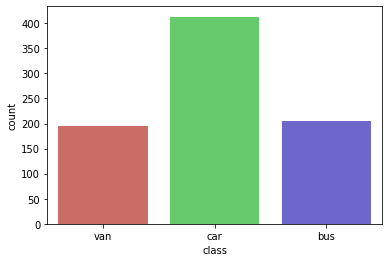

In [306]:
#plot the 'class' variable distribution
import seaborn as sns
sns.countplot(x='class', data=r4_df, palette='hls')

### Check for any missing values in the data 

In [307]:
#check if any missing values are there, just to make sure that there are no missing values
r4_df.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

### 3. Standardize the data 

Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

In [308]:
#drop the target column before starting doing clustering
r4_df = r4_df.drop('class', axis=1)
#now apply zscore on all the independant variables
r4_df_scaled = r4_df.apply(zscore)
r4_df_scaled.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.163231,0.520408,0.060669,0.264970,1.283254,0.299721,-0.198517,0.129648,-0.217151,0.766312,-0.397397,-0.339014,0.301676,-0.321192,-0.071523,0.371287,-0.321809,0.171837
1,-0.322874,-0.619123,0.124067,-0.836393,-0.599253,0.085785,-0.591720,0.514333,-0.606014,-0.337462,-0.590034,-0.618754,-0.502972,-0.053505,0.538425,0.147109,0.003400,0.442318
2,1.256966,0.845988,1.518823,1.187734,0.530251,0.299721,1.162569,-1.152637,0.949438,0.697326,1.111591,1.122486,1.415804,0.080339,1.555006,-0.413338,-0.159204,0.036596
3,-0.079822,-0.619123,-0.002729,-0.300595,0.153750,0.085785,-0.742952,0.642562,-0.606014,-0.337462,-0.911095,-0.738643,-1.462359,-1.258099,-0.071523,-0.301249,1.629444,1.524243
4,-1.052030,-0.130753,-0.763506,1.068668,5.173770,9.285029,-0.591720,0.514333,-0.606014,-0.268476,1.689501,-0.647299,0.425468,7.307905,0.538425,-0.189159,-1.460039,-1.721531


### K - Means Clustering

### Assign a dummy array called Cluster_error

In [309]:
Cluster_error = []

### 5. Calculate errorrs for each K

Iterating values of k from 1 to 10 fit K means model
Using inertia

In [310]:
cluster_range = range( 1, 10 )
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters,n_init = 15, random_state=5)
  clusters.fit(r4_df_scaled)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  Cluster_error.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "Cluster_error": Cluster_error } )
clusters_df[0:15]

,num_clusters,Cluster_error
0,1,14634.000000
1,2,8623.136976
2,3,7037.467395
3,4,5739.201327
4,5,5185.908468
5,6,4706.497704
6,7,4350.686420
7,8,4089.485095
8,9,3847.137109


In [311]:
errors = clusters_df['Cluster_error']

#printing the slopes of the errors
for i in range(8):
    print(errors[i+1]-errors[i])

-6010.863024013561
-1585.6695813683682
-1298.2660677015629
-553.2928593023025
-479.41076317794705
-355.8112844918387
-261.2013254325584
-242.34798511093413


### 6. Plotting Elbow/ Scree Plot

Use Matplotlib to plot the scree plot - Note: Scree plot plots Errors vs the no of clusters

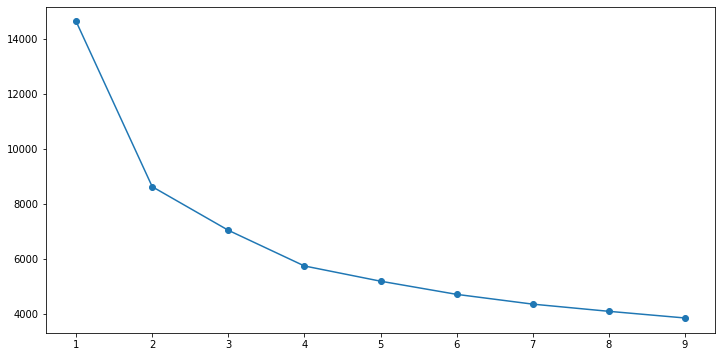

In [312]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.Cluster_error, marker = "o" )

### Find out the optimal value of K

In [313]:
#from elbow we could see that the optimal value of K is 4

### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

In [314]:
kmeans = KMeans(n_clusters=4, n_init = 15, random_state=5)
kmeans.fit(r4_df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=5, tol=0.0001, verbose=0)

You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

In [315]:
centroids=kmeans.cluster_centers_

### 7. Store the centroids in a dataframe with column names from the original dataset given 

In [316]:
centroid_df = pd.DataFrame(centroids, columns = list(r4_df_scaled) )

Hint: Use pd.Dataframe function 

In [317]:
centroid_df

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,-0.228397,-0.577113,-0.308062,-0.041242,0.178445,-0.173699,-0.456880,0.321991,-0.485592,-0.539969,-0.421529,-0.461481,-0.605499,-0.642849,-0.062341,0.012963,0.822192,0.705383
1,1.154428,1.184286,1.211987,0.973322,0.094921,0.218659,1.297968,-1.214247,1.301845,1.098306,1.205903,1.308987,1.091213,-0.107879,0.168326,0.267955,0.004670,0.190327
2,-0.915758,-0.522403,-0.889506,-1.087728,-0.561971,-0.300016,-0.779779,0.867364,-0.745939,-0.485536,-0.801746,-0.783837,-0.390575,0.783159,-0.090239,-0.296090,-1.047745,-1.103612
3,-0.733024,0.072735,-0.272171,2.947683,6.836652,8.696706,-0.535008,0.466248,-0.557406,0.283411,1.697528,-0.588068,0.212701,4.965638,-0.274839,-0.231193,-0.707994,-0.453651


### Use kmeans.labels_ function to print out the labels of the classes

In [318]:
labels = kmeans.labels_
df_labels = pd.DataFrame(labels, columns=list(['labels']))

df_labels['labels'] = df_labels['labels'].astype('category')
print(df_labels)

    labels
0        0
1        0
2        1
3        0
4        3
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       1
14       2
15       0
16       1
17       2
18       2
19       0
20       0
21       1
22       0
23       2
24       1
25       1
26       2
27       0
28       0
29       0
..     ...
783      0
784      1
785      1
786      0
787      2
788      1
789      0
790      1
791      1
792      2
793      0
794      1
795      2
796      2
797      0
798      0
799      1
800      2
801      2
802      1
803      2
804      0
805      0
806      0
807      0
808      0
809      0
810      1
811      0
812      2

[813 rows x 1 columns]


## Hierarchical Clustering 

### 8. Variable creation

For Hierarchical clustering, we will create datasets using multivariate normal distribution to visually observe how the clusters are formed at the end

In [319]:
np.random.seed(101)  # for repeatability of this dataset
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.multivariate_normal.html

### 9. Combine all three arrays a,b,c into a dataframe

In [320]:
#combining all 3 arrays into a dataframe
df = pd.DataFrame(data=np.concatenate((a, b, c),  axis=0),columns=['x', 'y'])
df

,x,y
0,13.882785,4.438501
1,11.687256,1.250981
2,10.316397,1.449346
3,9.837412,-2.041974
4,8.691601,-4.289773
5,9.824164,1.444590
6,9.216889,0.960682
7,10.199509,-2.480899
8,12.813390,-1.256776
9,13.841511,4.209154


### 10. Use scatter matrix to print all the 3 distributions

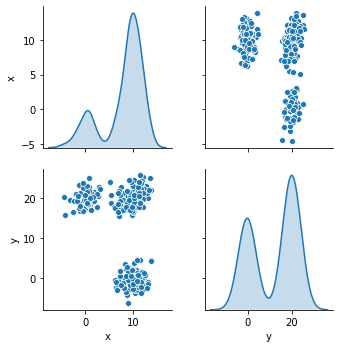

In [321]:
import seaborn as sns
sns.pairplot(df,diag_kind='kde')

### 11. Find out the linkage matrix

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.linkage.html

Use ward as linkage metric and distance as Eucledian

In [322]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(df, 'ward', metric='euclidean')
print(Z)

[[6.00000000e+00 3.50000000e+01 4.03105214e-02 2.00000000e+00]
 [1.59000000e+02 2.47000000e+02 4.15336058e-02 2.00000000e+00]
 [1.90000000e+02 2.14000000e+02 4.23431904e-02 2.00000000e+00]
 [1.50000000e+01 5.50000000e+01 5.03965285e-02 2.00000000e+00]
 [2.30000000e+01 9.70000000e+01 5.98615830e-02 2.00000000e+00]
 [1.83000000e+02 2.30000000e+02 7.14307127e-02 2.00000000e+00]
 [1.60000000e+02 1.84000000e+02 8.10640748e-02 2.00000000e+00]
 [5.20000000e+01 9.80000000e+01 8.63310058e-02 2.00000000e+00]
 [1.75000000e+02 2.33000000e+02 9.07935743e-02 2.00000000e+00]
 [8.00000000e+00 1.90000000e+01 1.05398862e-01 2.00000000e+00]
 [6.60000000e+01 7.30000000e+01 1.08977001e-01 2.00000000e+00]
 [5.90000000e+01 9.60000000e+01 1.15828291e-01 2.00000000e+00]
 [9.20000000e+01 2.53000000e+02 1.34937651e-01 3.00000000e+00]
 [2.10000000e+02 2.31000000e+02 1.37055098e-01 2.00000000e+00]
 [1.54000000e+02 2.11000000e+02 1.37824764e-01 2.00000000e+00]
 [1.30000000e+01 6.90000000e+01 1.52703764e-01 2.000000

### 12. Plot the dendrogram for the consolidated dataframe

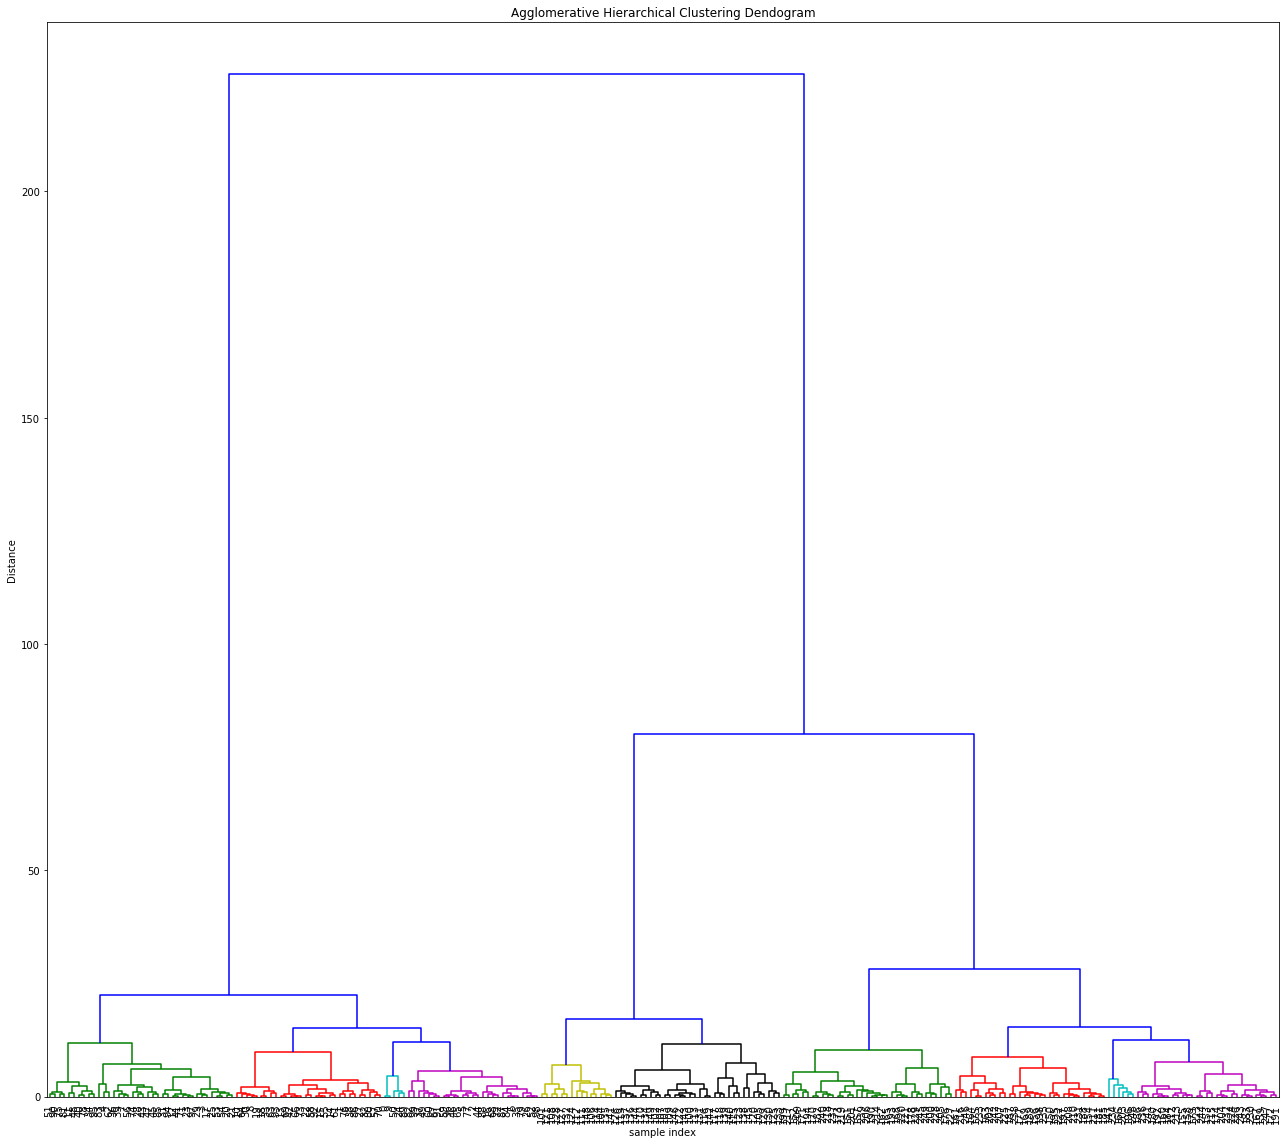

In [323]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z,leaf_rotation=90.0,p=25,color_threshold=12,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()

### 13. Recreate the dendrogram for last 12 merged clusters 

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html

Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram 

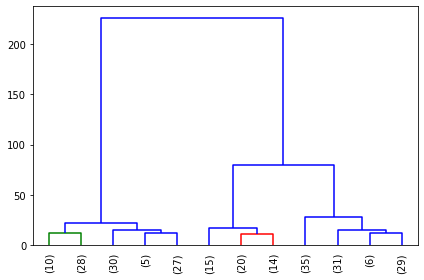

In [324]:
dendrogram(Z,leaf_rotation=90.0,p=12,color_threshold=12,leaf_font_size=10,truncate_mode='lastp')
plt.tight_layout()

### 14. From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.cluster.hierarchy.fcluster.html

In [325]:
#From the above diagram, the optimal distance is 50

### 15. Using this distance measure and fcluster function to cluster the data into 3 different groups

In [326]:
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, 50, criterion='distance')
print(clusters)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3
 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


### Use matplotlib to visually observe the clusters in 2D space 

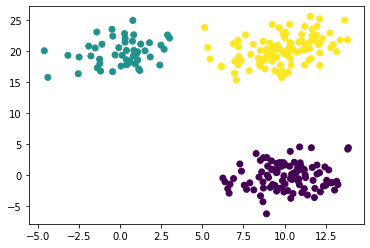

In [327]:
plt.scatter(x=df['x'], y=df['y'], c=clusters)